<a href="https://colab.research.google.com/github/misqualzarabi/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_Copy_of_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
voting_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

missing_values = ["n/a", "na", "NaN", "?"]

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats 
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
df = pd.read_csv(voting_data_url, header=None)


In [0]:
column_names = ['Class Name','handicapped-infants','water-project-cost-sharing','budget-resolution',' physician-fee-freeze', 'el-salvador-aid','religious-groups-in-schools',
           
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile','immigration','synfuels-corporation','education-spending', 'superfund-right-to-sue',
           
           'crime','duty-free-exports','export-administration-act-south-africa']

In [0]:
df = pd.read_csv(voting_data_url, names=column_names, na_values=missing_values)

In [0]:
df.replace({'n':0, 'y':1},inplace=True)

In [0]:
df.fillna(method='ffill', inplace=True)

In [8]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [9]:
df.shape

(435, 17)

In [0]:
n = len(df)

In [11]:
df_mean = df["budget-resolution"].mean()
df_std = np.std(df["budget-resolution"], ddof=1)              # Mean and Standard deviation
print(df_mean, df_std)

0.5862068965517241 0.49307938943351104


In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [13]:
standard_error = df_std/np.sqrt(n)
standard_error

0.023641347195218865

In [14]:
t = 1.962
(df_mean, df_mean - t*standard_error, df_mean + t*standard_error)

(0.5862068965517241, 0.5398225733547046, 0.6325912197487435)

In [15]:
confidence_interval(df["budget-resolution"], confidence=0.95)

(0.5862068965517241, 0.5397411274122058, 0.6326726656912424)

In [16]:
  t = stats.t.ppf((1 + 0.95) / 2.0, n - 1)
  t

1.9654450635078535

(0, 10)

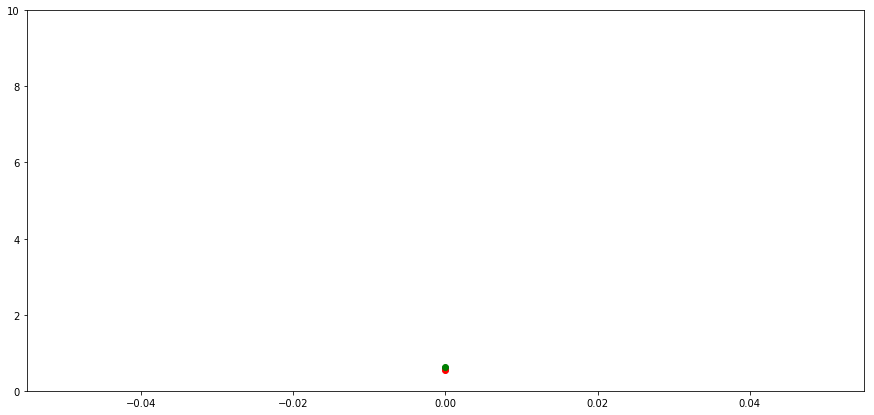

In [17]:
figure(figsize=(15,7))
plot(df_mean,"bo")                                   # Graphically representing the confidence interval
plot(df_mean - t*standard_error,"ro")
plot(df_mean + t*standard_error,"go")

ylim(0,10)

By hand using "Numpy"

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(data.shape)
data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
cut_points = [20,30,40,50,60,70,100]
label_names = ['20-30', '31-40', '41-50', '51-60', '61-70', '80+']
data['age_by_categories'] = pd.cut(data['age'], cut_points, labels=label_names)
data['age_by_categories'].value_counts()

31-40    8546
20-30    8162
41-50    6983
51-60    4128
61-70    1792
80+       540
Name: age_by_categories, dtype: int64

In [20]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [21]:
data = data.sort_values(by='age_by_categories')
contingency_table = pd.crosstab(data['education'], data['age_by_categories'], margins=True)
contingency_table


age_by_categories,20-30,31-40,41-50,51-60,61-70,80+,All
education,,,,,,,
10th,184,175,116,155,74,22,726
11th,226,206,143,106,58,18,757
12th,95,82,50,44,19,3,293
1st-4th,26,35,30,43,18,12,164
5th-6th,80,59,73,61,32,16,321
7th-8th,94,95,127,139,124,47,626
9th,107,116,80,90,53,17,463
Assoc-acdm,311,369,241,99,26,7,1053
Assoc-voc,376,462,319,142,55,15,1369


In [22]:
row_sums = contingency_table.iloc[0:16,6].values
col_sums = contingency_table.iloc[16, 0:6].values

print(row_sums)
print(col_sums)

[ 726  757  293  164  321  626  463 1053 1369 5352  413 9838 1721   49
  576 6430]
[8162 8546 6983 4128 1792  540]


In [23]:
total = contingency_table.loc['All','All']
total

30151

In [24]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(16, 6)
[[1.96531193e+02 2.05777453e+02 1.68142284e+02 9.93973003e+01
  4.31492156e+01 1.30025538e+01]
 [2.04923021e+02 2.14564094e+02 1.75321913e+02 1.03641538e+02
  4.49916752e+01 1.35577593e+01]
 [7.93163079e+01 8.30479254e+01 6.78590760e+01 4.01148884e+01
  1.74142151e+01 5.24758714e+00]
 [4.43954761e+01 4.64841630e+01 3.79825545e+01 2.24533846e+01
  9.74720573e+00 2.93721601e+00]
 [8.68960233e+01 9.09842460e+01 7.43439024e+01 4.39483931e+01
  1.90783722e+01 5.74906305e+00]
 [1.69460781e+02 1.77433452e+02 1.44982190e+02 8.57062121e+01
  3.72057975e+01 1.12115684e+01]
 [1.25336009e+02 1.31232729e+02 1.07231236e+02 6.33897383e+01
  2.75180259e+01 8.29226228e+00]
 [2.85051441e+02 2.98462340e+02 2.43875792e+02 1.44167159e+02
  6.25841929e+01 1.88590760e+01]
 [3.70593944e+02 3.88029385e+02 3.17061689e+02 1.87430997e+02
  8.13653942e+01 2.45185898e+01]
 [1.44880846e+03 1.51697098e+03 1.23952824e+03 7.32747040e+02
  3.18091738e+02 9.58535372e+01]
 [1.11800803e+02 1.17060728e+02 9.56511890

In [25]:
observed = pd.crosstab(data['education'], data['age_by_categories']).values
observed.shape
observed

array([[ 184,  175,  116,  155,   74,   22],
       [ 226,  206,  143,  106,   58,   18],
       [  95,   82,   50,   44,   19,    3],
       [  26,   35,   30,   43,   18,   12],
       [  80,   59,   73,   61,   32,   16],
       [  94,   95,  127,  139,  124,   47],
       [ 107,  116,   80,   90,   53,   17],
       [ 311,  369,  241,   99,   26,    7],
       [ 376,  462,  319,  142,   55,   15],
       [1556, 1614, 1310,  572,  239,   61],
       [  22,  102,  128,   97,   49,   15],
       [2613, 2882, 2140, 1420,  610,  173],
       [ 197,  463,  616,  321,   94,   30],
       [  10,   13,    7,   11,    6,    2],
       [  61,  171,  196,   83,   43,   22],
       [2204, 1702, 1407,  745,  292,   80]])

In [26]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

1652.1475669928102

-- In a single line using Scipy

In [27]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

1652.1475669928102 2.3896469370295212e-295 75 [[1.96531193e+02 2.05777453e+02 1.68142284e+02 9.93973003e+01
  4.31492156e+01 1.30025538e+01]
 [2.04923021e+02 2.14564094e+02 1.75321913e+02 1.03641538e+02
  4.49916752e+01 1.35577593e+01]
 [7.93163079e+01 8.30479254e+01 6.78590760e+01 4.01148884e+01
  1.74142151e+01 5.24758714e+00]
 [4.43954761e+01 4.64841630e+01 3.79825545e+01 2.24533846e+01
  9.74720573e+00 2.93721601e+00]
 [8.68960233e+01 9.09842460e+01 7.43439024e+01 4.39483931e+01
  1.90783722e+01 5.74906305e+00]
 [1.69460781e+02 1.77433452e+02 1.44982190e+02 8.57062121e+01
  3.72057975e+01 1.12115684e+01]
 [1.25336009e+02 1.31232729e+02 1.07231236e+02 6.33897383e+01
  2.75180259e+01 8.29226228e+00]
 [2.85051441e+02 2.98462340e+02 2.43875792e+02 1.44167159e+02
  6.25841929e+01 1.88590760e+01]
 [3.70593944e+02 3.88029385e+02 3.17061689e+02 1.87430997e+02
  8.13653942e+01 2.45185898e+01]
 [1.44880846e+03 1.51697098e+03 1.23952824e+03 7.32747040e+02
  3.18091738e+02 9.58535372e+01]
 [1.

Null Hypothesis: Age per categories is independent of education.

Due to a p-value of less than .05, we REJECT the null hypothesis that age per categories and education are independent, and conclude that there is an association between age per categories and education.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)